In [93]:
from keras.datasets import imdb
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [94]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words  = 10000)

In [ ]:
# vectorize all of the data and split them into training/validation 
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


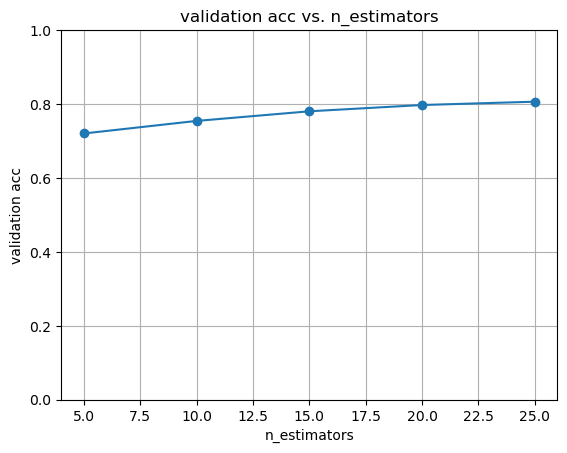

In [96]:
n_estimators = [5, 10, 15, 20, 25]
results = []
for i in n_estimators:
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(partial_x_train, partial_y_train)
    predictions = random_forest.predict(x_val)
    accuracy = accuracy_score(y_val, predictions)
    results.append(round(accuracy, 3))


plt.plot(n_estimators, results, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('validation acc')
plt.title('validation acc vs. n_estimators')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


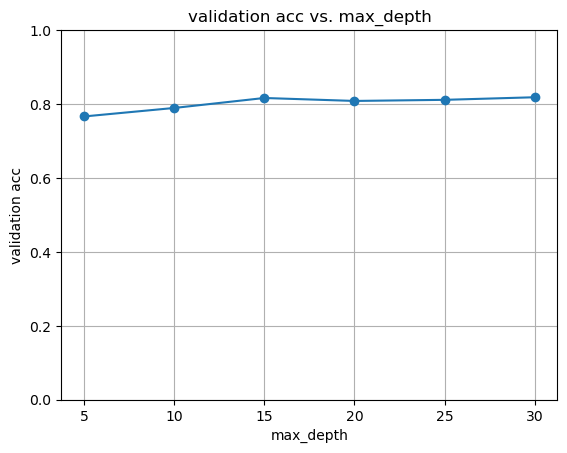

In [92]:
# from previous experiment, best n_estimator seems to plateau in performance at 25, afterward is unneccessarily expensive
max_depth = list(range(5, 35, 5))
results = []
validation_accuracies = []
for i in max_depth:
    random_forest = RandomForestClassifier(n_estimators=25, max_depth = i)
    random_forest.fit(partial_x_train, partial_y_train)
    predictions = random_forest.predict(x_val)
    accuracy = accuracy_score(y_val, predictions)
    results.append(round(accuracy, 3))

plt.plot(max_depth, results, marker='o')
plt.xlabel('max_depth')
plt.ylabel('validation acc')
plt.title('validation acc vs. max_depth')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

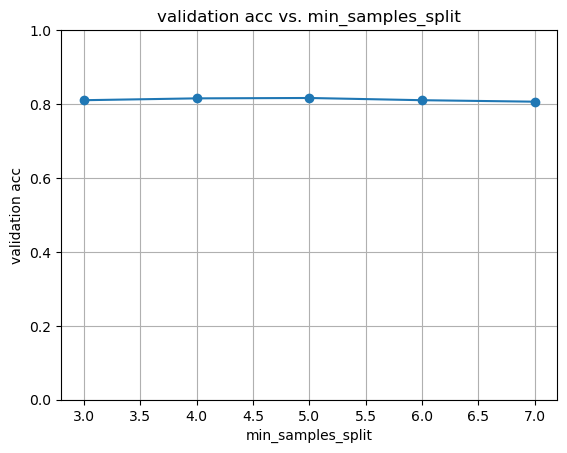

In [97]:
# from the previous experiment the max_depth seems not to matter too much, just pick the lowest one to save time
min_samples_split = [3, 4, 5, 6, 7]
results = []
for i in min_samples_split:
    random_forest = RandomForestClassifier(n_estimators=25, max_depth = 20, min_samples_split = i)
    random_forest.fit(partial_x_train, partial_y_train)
    predictions = random_forest.predict(x_val)
    accuracy = accuracy_score(y_val, predictions)
    results.append(round(accuracy, 3))


plt.plot(min_samples_split, results, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('validation acc')
plt.title('validation acc vs. min_samples_split')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

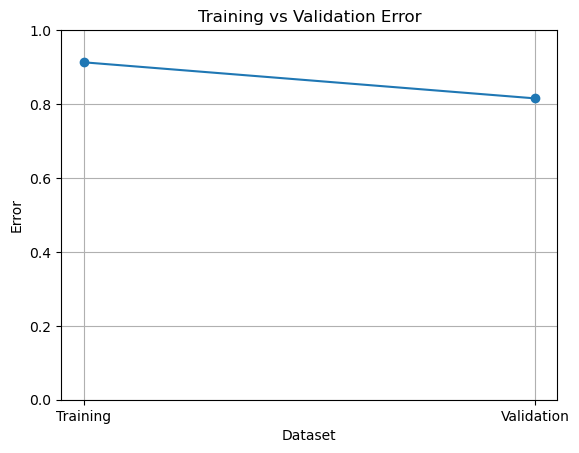

In [89]:
random_forest = RandomForestClassifier(n_estimators=25, max_depth=20, min_samples_split=5, criterion='gini')
random_forest.fit(x_train, y_train)
train_error = random_forest.score(x_train, y_train)
val_error = cross_val_score(random_forest, x_train, y_train, cv=5).mean()


plt.plot([0, 1], [train_error, val_error], marker='o')
plt.xlabel('Dataset')
plt.ylabel('Error')
plt.title('Training vs Validation Error')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [98]:
# using the best parameters from each of the previous experiments, evaluate the accuracy on the testing dataset
random_forest = RandomForestClassifier(n_estimators=25, max_depth = 20, min_samples_split = 5, criterion='gini')
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(round(accuracy, 3))


0.815
